## This notebook was created to do some intial analysis on the walk embeddings created

### All walk embeddings are stored as sparse matrices in /sparce_matrices_results on the shared drive. 

## If performing TSNE, GPU is needed to use boosted tsne. Also, the following packages cuML and cuDF will need to be installed each time to run boosted tsne. This process takes ~ 15 minutes

## If not running TSNE skip to cell mounting shared drive and proceed from there

In [ ]:
# mount google drive to colab
from google.colab import drive
import os
n=20
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone2/


print("###\n### {}".format(os.getcwd()))
print("#" * n)

Mounted at /content/drive
####################
### colabs default working directory
###
### path: /content
####################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone2
###
### /content/drive/Shareddrives/MADS_Milestone2
####################


In [ ]:
!pip install csrgraph

  Created wheel for csrgraph: filename=csrgraph-0.1.28-py3-none-any.whl size=17632 sha256=4c3f08b5e1e68b0cd1e8a8e9fbbf68ec9179c207116e75ac38019b06eb531964
  Stored in directory: /root/.cache/pip/wheels/3d/0a/58/36a63805f1cd719cbcc5a3c4c109604985a809e7d81bac1649
Successfully built csrgraph


In [ ]:
import csrgraph as cg
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## If you want to look up specific drug's embeddings, the indices will need to be imported to identfy drugs (rows) or the nodes (columns). Importing the network frame is neccesary to recreate the indices. Only load the network you are analyzing (one at a time unless you copy the code blocks with new variables)


In [ ]:
def get_indicies_and_features(df_path, start_nodes='drug'): # start_nodes is drug or indication
 
  '''This function retrieves the row indices (drugs) of the sparse matrix
  that is being analyzed; it also gets the feature names (nodes) from the
  walk embedding. The input must be the path to the network df'''
 
  df = pd.read_csv(df_path)
 
  df['node1'] = df['node1'].astype(str)
  df['node2'] = df['node2'].astype(str)
 
  drug_nodes = list(df[df['node1_type'] == 'drug']['node1'].unique())
  disease_nodes = list(df[df['node2_type'] == 'disease']['node2'].unique())
 
  G = nx.from_pandas_edgelist(df, 'node1', 'node2')
  Gc = max(nx.connected_components(G), key=len) #get largest connected component
  Gx = cg.csrgraph(G.subgraph(Gc), threads=0) 
  node_names = Gx.names
  ''' below needed to convert to graph indices to be used as input
      starting nodes for walks'''
  if start_nodes =='drug':
    network_drug_nodes = []
    for i in drug_nodes:
      for idx, node in enumerate(node_names):
        if i == node:
          network_drug_nodes.append(node)
  
    from sklearn.feature_extraction.text import CountVectorizer
  
    all_nodes = list(G.subgraph(Gc).nodes) # nodes only in largest connected component
    all_nodes = [str(i).strip() for i in all_nodes]
  
    vectorizer = CountVectorizer(stop_words=[], vocabulary=set(all_nodes), lowercase=False) # need to set up like this as a trick to include nodes that are one character and not lowercase
    vectorizer.fit(set(all_nodes), ) #all nodes
  
    features = vectorizer.get_feature_names_out()
    return network_drug_nodes, features
  
  else: # indication nodes
    network_disease_nodes = [] # only needed if we are starting the walks from disease nodes
    for i in disease_nodes:
      for idx, node in enumerate(node_names):
        if i == node:
          network_disease_nodes.append(node)
  
    from sklearn.feature_extraction.text import CountVectorizer
  
    all_nodes = list(G.subgraph(Gc).nodes) # nodes only in largest connected component
    all_nodes = [str(i).strip() for i in all_nodes]
  
    vectorizer = CountVectorizer(stop_words=[], vocabulary=set(all_nodes), lowercase=False) # need to set up like this as a trick to include nodes that are one character and not lowercase
    vectorizer.fit(set(all_nodes), ) #all nodes
  
    features = vectorizer.get_feature_names_out()
  
    return network_disease_nodes, features


In [ ]:
ls res/

 biological_functions_improved_graph.gdoc
 biological_functions_improved_graph.png
'diff_rank_vs_shortest_path_relation (1).gdoc'
'diff_rank_vs_shortest_path_relation (2).gdoc'
 diff_rank_vs_shortest_path_relation.gdoc
 diff_rank_vs_shortest_path_relation.png
 edge_list_updated22jan.csv
 filtered_base_incl_bf_layer_network2_one_approval.csv
 filtered_base_incl_bf_layer_network.csv
 filtered_base_network2_one_approval.csv
 filtered_base_network.csv
 filtered_edges_gephi.csv
 final_bf_bf_and_bf_protein_interaction_network.csv
 final_disease_protein_interaction_network.csv
 final_drug_protein_interaction_network.csv
 final_protein_protein_interaction_network.csv
 gephi_node_list.csv
 INTEGRATED_FINAL_NETWORK.csv
 INTEGRATED_FINAL_NETWORK_with_bf.csv
 intermediate_biological_function.csv
 intermediate_protein_biological_function_map.csv
 keep_biological_functions.csv
 keep_biological_functions_network2_one_approval.csv
 processed_protein_protein_interactions.csv
 v3terminal_base_filt_indic

## load the random walks for drugs and indications

In [ ]:
# base
drug_indices_base, drug_features_base =       get_indicies_and_features("res/filtered_base_network.csv", start_nodes='drug')
disease_indices_base, disease_features_base = get_indicies_and_features("res/filtered_base_network.csv", start_nodes='disease')


# base + biological function
drug_indices_adv, drug_features_adv =       get_indicies_and_features("res/filtered_base_incl_bf_layer_network.csv", start_nodes='drug')
disease_indices_adv, disease_features_adv = get_indicies_and_features("res/filtered_base_incl_bf_layer_network.csv", start_nodes='disease')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1,2,13,14,15,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1,2,13,14,15,17,20,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
# change path
%cd /content/drive/Shareddrives/MADS_Milestone2/sparse_mtx_results

/content/drive/Shareddrives/MADS_Milestone2/sparse_mtx_results


### sparce matrices options

In [ ]:
ls

filtered_base_drugstart_terminal.npz
filtered_base_indicationstart_terminal.npz
filtered_base_network_01jan.npz
filtered_base_network_31dec.npz
no_bf_31dec.npz
no_bf_no_filter_01jan.npz
no_bf_no_filter_28Dec.npz
v2terminal_filtered_base_drugstart.npz
v2terminal_filtered_base_indicationstart.npz
v2terminal_filt_inclbf_drugstart.npz
v2terminal_filt_inclbf_indicationstart.npz
v3terminal_base_bf_drugstart_nwv3.npz
v3terminal_base_bf_indicationstart_nwv3.npz
v3terminal_base_filt_drugstart.npz
v3terminal_base_filt_drugstart_nwv2.npz
v3terminal_base_filt_drugstart_nwv3.npz
v3terminal_base_filt_drugstart_sanity.npz
v3terminal_base_filt_indicationstart.npz
v3terminal_base_filt_indicationstart_nwv2.npz
v3terminal_base_filt_indicationstart_nwv3.npz
v3terminal_base_filt_indicationstart_sanity.npz
walk_settings.gdoc


## Load the networks


In [ ]:
base = pd.read_csv("../res/filtered_base_network.csv", dtype={"node1": str, "node2": str})
adv = pd.read_csv("../res/filtered_base_incl_bf_layer_network.csv", dtype={"node1": str, "node2": str})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,15,17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,15,17,20,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sum([1 for i,r in base.iterrows() if (r["node1_type"] == "protein") and (r["node2_type"] == "protein")])

25246

In [ ]:
!pip install igraph
import igraph as ig

base_graph = ig.Graph.TupleList(base.loc[:,["node1", "node2"]].itertuples(index=False), directed=False, weights=False)

# base_graph.get_diameter(directed=False)
print(base_graph.average_path_length(directed=False, unconn=True))


     |████████████████████████████████| 3.1 MB 4.8 MB/s 
4.114776763629355


In [ ]:
adv_graph = ig.Graph.TupleList(adv.loc[:,["node1", "node2"]].itertuples(index=False), directed=False, weights=False)
print(adv_graph.average_path_length(directed=False, unconn=True))

5.009819176481886


load the sparced random walk matrices

In [ ]:
from scipy import sparse
mtx_disease_base_50 = sparse.load_npz('v3terminal_base_filt_indicationstart_nwv3.npz')
mtx_drug_base_50 = sparse.load_npz('v3terminal_base_filt_drugstart_nwv3.npz')
print(mtx_disease_base_50.shape, mtx_drug_base_50.shape)

mtx_disease_adv_50 = sparse.load_npz('v3terminal_base_bf_indicationstart_nwv3.npz')
mtx_drug_adv_50 = sparse.load_npz('v3terminal_base_bf_drugstart_nwv3.npz')
print(mtx_disease_adv_50.shape, mtx_drug_adv_50.shape)



(360, 14318) (1271, 14318)
(364, 41925) (1281, 41925)


In [ ]:
def prep_df(mtx_disease, mtx_drug, disease_indices, disease_features, drug_indices, drug_features, raw_net=base, drop_terminal_nodes = True):

  df_dis = pd.DataFrame(mtx_disease.todense(), index=disease_indices, columns=disease_features)
  df_dis["entity"] = "disease"
  df_drug = pd.DataFrame(mtx_drug.todense(), index=drug_indices, columns=drug_features)
  df_drug["entity"] = "drug"
  df = df_dis.append(df_drug)
  ind = (df.iloc[:,:-1].sum(axis=0) != 0)
  entity = df.entity
  print("filter out [False]")
  print(ind.value_counts())
  df = df.iloc[:,:-1].T[ind].T
  df["entity"] = entity
  
  import re
  dd_1 = raw_net.loc[:,["node1", "node1_type", "IndicationClass__filter"]].rename(columns={"node1": "node", "node1_type": "node_type"})
  dd_2 = raw_net.loc[:,["node2", "node2_type", "IndicationClass__filter"]].rename(columns={"node2": "node", "node2_type": "node_type"})

  dd = dd_1.append(dd_2)
  dd = dd[(dd.node_type == "drug") | (dd.node_type == "disease")].dropna().drop_duplicates("node")
  Ind_class = dd.set_index("node").loc[:,"IndicationClass__filter"].to_dict()

  df["IndicationClass"] = df.index.to_list()
  df["IndicationClass"] = df["IndicationClass"].replace(Ind_class)
  df["IndicationClass"] = [i if re.match("\w\d{2,2}?;|\w\d{2,2}$", str(i)) else "" for i in df["IndicationClass"] ]
  
  disease_mapping = pd.read_csv("../dat/disease_mappings.tsv.gz", compression='gzip',  sep='\t') 

  disease_mapping["convertion"] = disease_mapping.apply(lambda x:  x["vocabulary"] + "_" + x["code"]  , axis=1) 
  disease_mapping = disease_mapping[disease_mapping.vocabulary == "EFO"]
  disease_mapping[disease_mapping.convertion == "EFO_0000538"]

  conv = disease_mapping.set_index("convertion").to_dict("diseaseId")

  indication = pd.read_pickle('../dat/dfs/indication')
  ind = [True if len(i) else False for i in indication.approvedIndications]
  approved = indication[ind].explode("approvedIndications")

  approved["UMLS"] = approved["approvedIndications"].replace(conv["diseaseId"])
  approved_ind = approved.groupby("id").agg({"UMLS": ["count", list]}).droplevel(level=0, axis=1).to_dict()


  df["FreqApprovedInd"] = df.index.to_list()
  df["FreqApprovedInd"] = df["FreqApprovedInd"].replace(approved_ind["count"])
  df["FreqApprovedInd"] = [float(i) if re.match("^[0-9]", str(i)) else None for i in df["FreqApprovedInd"] ]

  for i in df.index.to_list():
    if i in list(approved_ind["list"].keys()):
      df.loc[i:,"ApprovedInd"] = str(approved_ind["list"][i])

  df.ApprovedInd.apply(lambda x: x if isinstance(x, str) == False else [s.strip()[1:-1] for s in x[1:-1].split(',')] )
  
  
  rem = ["entity", "IndicationClass", "FreqApprovedInd", "ApprovedInd"]
  if drop_terminal_nodes:
    rem += df.index.tolist()
    
  features = df.loc[:,rem]
  X = df.drop(rem, axis=1)

  return X, features


In [ ]:
X_base_50, features_base_50 = prep_df(mtx_disease_base_50, mtx_drug_base_50, disease_indices_base, disease_features_base, drug_indices_base, drug_features_base, raw_net=base, drop_terminal_nodes = False)

X_adv_50, features_adv_50 = prep_df(mtx_disease_adv_50, mtx_drug_adv_50, disease_indices_adv, disease_features_adv, drug_indices_adv, drug_features_adv, raw_net=adv, drop_terminal_nodes = False)

filter out [False]
True     13833
False      485
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


filter out [False]
False    26311
True     15614
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [ ]:
X_base_50.shape,X_adv_50.shape

((1631, 13833), (1645, 15614))

## Create PCA plots

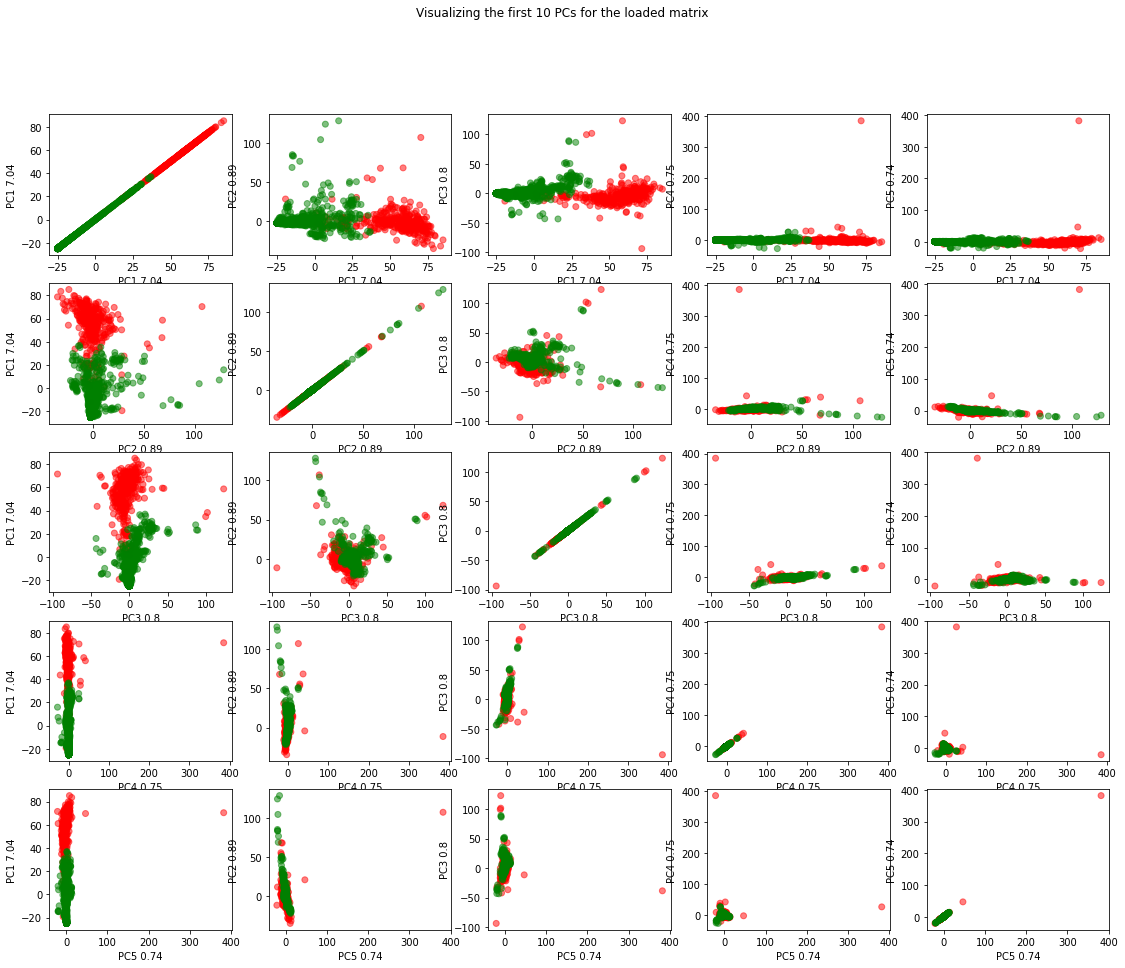

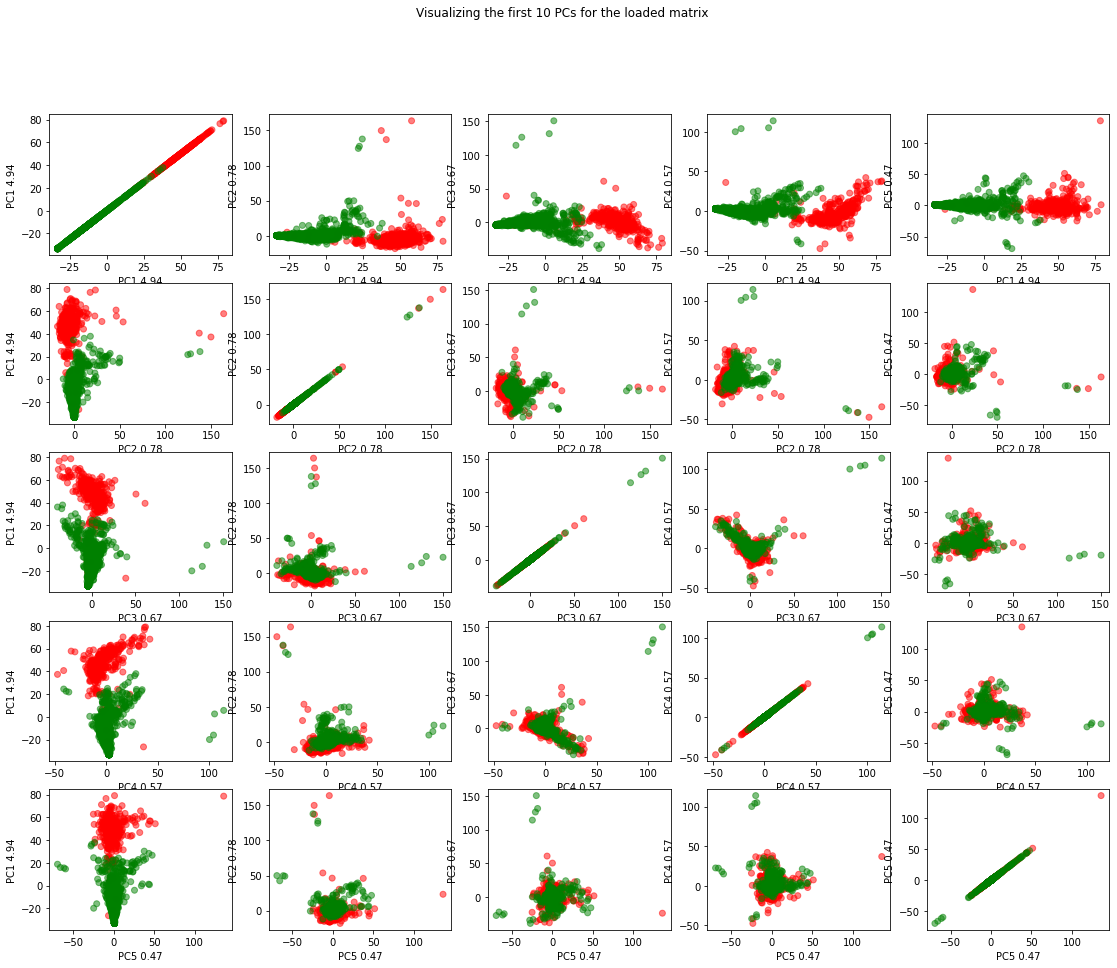

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def pca_plot(X, features, n_comp=10, subplt = (5,5)):

  pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
  mtx_pca = pipeline.fit_transform(X)

  col = ["red" if i == "disease" else "green" for i in features.entity.tolist()]
 
  alpha = 0.5
  fig, axes = plt.subplots(subplt[0], subplt[1], figsize=(19, 15),)
  fig.suptitle('Visualizing the first {} PCs for the loaded matrix'.format(n_comp))

  for i,q in enumerate(range(5)):
    for j,p in enumerate(range(5)):
      axes[i,j].scatter(mtx_pca[:,q],mtx_pca[:, p], c=col, cmap='Set3', alpha=alpha )
      axes[i,j].set_xlabel('PC'+str(q+1) + " " + str(round(pipeline["pca"].explained_variance_ratio_[q]*100,2)))
      axes[i,j].set_ylabel('PC'+str(p+1) + " " + str(round(pipeline["pca"].explained_variance_ratio_[p]*100,2)))
  plt.show()


pca_plot(X_base_50, features_base_50, n_comp=10, subplt = (5,5))
pca_plot(X_adv_50, features_adv_50, n_comp=10, subplt = (5,5))

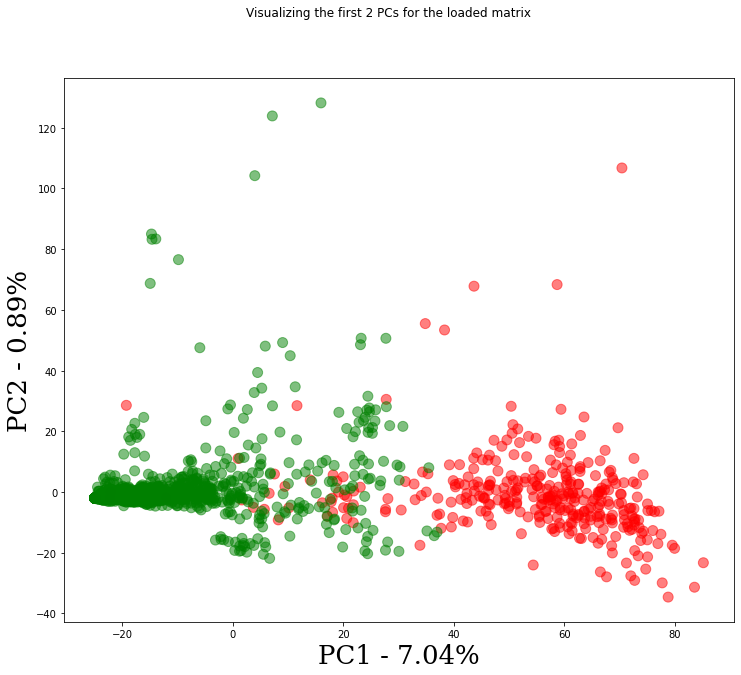

In [ ]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
mtx_pca = pipeline.fit_transform(X_base_50)

col = ["red" if i == "disease" else "green" for i in features_base_50.entity.tolist()]

alpha = 0.5
fig, axes = plt.subplots(1, 1, figsize=(12, 10),)
fig.suptitle('Visualizing the first {} PCs for the loaded matrix'.format(2))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 26,
        }
q=0
p=1
axes.scatter(mtx_pca[:,q],mtx_pca[:, p], c=col, cmap='Set3', alpha=alpha, s=100)
axes.set_xlabel('PC'+str(q+1) + " - " + str(round(pipeline["pca"].explained_variance_ratio_[q]*100,2)) + "%", fontdict=font)
axes.set_ylabel('PC'+ str(p+1) + " - " + str(round(pipeline["pca"].explained_variance_ratio_[p]*100,2)) + "%", fontdict=font)

plt.show()

In [ ]:
PIP = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])

PIP.fit_transform(X_base_50)
plt.bar(x=list(range(len(PIP["pca"].explained_variance_ratio_))), height=PIP["pca"].explained_variance_ratio_.cumsum())

PIP.fit_transform(X_adv_50)
plt.bar(x=list(range(len(PIP["pca"].explained_variance_ratio_))), height=PIP["pca"].explained_variance_ratio_.cumsum())



use the first n principal components capturing 80% of variance to feed into UMAP

In [ ]:
!pip install umap-learn
import umap
def pca_to_umap(X, n_comp=400):
  PIP1 = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
  PIP2 = Pipeline([('scaling', StandardScaler()), ('umap', umap.UMAP(n_components=2))])

  pca_embed = PIP1.fit_transform(X)
  df_subset = pd.DataFrame(pca_embed[:,1:], columns= ["PC"+str(i) for i in list(range(2,n_comp+1))])
  embedding = PIP2.fit_transform(df_subset)
  print(embedding.shape)

  from sklearn.cluster import DBSCAN
  db = DBSCAN()
  y_pred = db.fit_predict(embedding)

  plt.figure(figsize=(10, 10), dpi=80)
  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=y_pred, cmap='Set3')
  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP projection of dataset', fontsize=24)

  return y_pred




In [ ]:
y_pred_base_50 = pca_to_umap(X= X_base_50, n_comp=300)


In [ ]:
y_pred_adv_50 = pca_to_umap(X= X_adv_50, n_comp=300)


## Apply random projection


In [ ]:
def random_projection(X, features, n_comp=2, rand_state=1):
  from sklearn import random_projection
  srp_full = random_projection.GaussianRandomProjection(random_state=rand_state)
  z_full = srp_full.fit_transform(X)
  
  srp = random_projection.GaussianRandomProjection(n_components=n_comp, random_state=rand_state)
  z = srp.fit_transform(X)
  print(z.shape)

  # from sklearn.cluster import DBSCAN
  # db = DBSCAN(min_samples=3)
  # y_pred = db.fit_predict(z)

  df_srp_full = pd.DataFrame(z_full, index=X.index)
  # df_srp_full = df_srp_full.merge(features, left_index=True, right_index=True)

  df_srp = pd.DataFrame(z, index=X.index, columns=["comp-1", "comp-2"])
  df_srp = df_srp.merge(features, left_index=True, right_index=True)

  # fig, axes = plt.subplots(1,2, figsize=(19, 15),)
  plt.figure(figsize=(8, 8), dpi=80)
  col = ["green" if i != "disease" else "black" for i in features.entity.tolist()]
  plt.scatter(df_srp.loc[:,"comp-1"],df_srp.loc[:, "comp-2"], c=col, cmap='Set3', alpha=0.5)
  # plt.scatter(df_srp.loc[:,"comp-1"],df_srp.loc[:, "comp-2"], c=y_pred, cmap='Set3', alpha=0.5)

  plt.show()

  return df_srp_full



In [ ]:
rand_base = random_projection(X=X_base_50, features = features_base_50, n_comp=2, rand_state=1)
rand_adv = random_projection(X=X_adv_50, features = features_adv_50, n_comp=2, rand_state=1)


## Similarity between drugs and idnications using cosine since data is not normalized and cosine accounts for that

In [ ]:
def cosine_similarity_(mtx):

  '''calculate pairwise similarities for each walk. Input is matrix from
  create full network function'''

  from sklearn.metrics.pairwise import cosine_similarity
  from scipy import sparse

  A_sparse = mtx

  # similarities = cosine_similarity(A_sparse)
  # print('pairwise dense output:\n {}\n'.format(similarities))

  #also can output sparse matrices
  similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
  # print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

  return similarities_sparse

apply cosine to dataset and random projected and reduced dataset

In [ ]:
cosine_df_base_50 = pd.DataFrame(cosine_similarity_(X_base_50), index=X_base_50.index, columns=X_base_50.index)
cosine_df_adv_50 = pd.DataFrame(cosine_similarity_(X_adv_50), index=X_adv_50.index, columns=X_adv_50.index)

# cosine_df_base_red_50 = pd.DataFrame(cosine_similarity_(rand_base), index=X_base_50.index, columns=X_base_50.index)
# cosine_df_adv_red_50 = pd.DataFrame(cosine_similarity_(rand_adv), index=X_adv_50.index, columns=X_adv_50.index)



## apply hierachical clustering

In [ ]:
# cosine_df_base = cosine_df_base.iloc[:,:1631]

In [ ]:
def get_cluster_classes(den, label='ivl'):
  from collections import defaultdict
  cluster_idxs = defaultdict(list)
  for c, pi in zip(den['color_list'], den['icoord']):
      for leg in pi[1:3]:
          i = (leg - 5.0) / 10.0
          if abs(i - int(i)) < 1e-5:
              cluster_idxs[c].append(int(i))

  cluster_classes = {}
  for c, l in cluster_idxs.items():
      i_l = [den[label][i] for i in l]
      cluster_classes[c] = i_l

  return cluster_classes

def heatmap_clust(cosine_df, features, thr=8):
  import scipy
  import seaborn as sns

  g = sns.clustermap(1-cosine_df)
  den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                           labels = cosine_df.index,
                                           color_threshold=thr)  
  
  clusters = get_cluster_classes(den)

  cosine_df["cluster"] = None
  for i in cosine_df.index:
      included=False
      for j in clusters.keys():
          if i in clusters[j]:
              cosine_df.loc[i,"cluster"] = j
              # cluster.append(j)
              included=True
      # if not included:
      #     cluster.append(None)

  g = sns.clustermap(1-cosine_df.iloc[:,:-1],  row_colors=cosine_df.cluster, col_colors=cosine_df.cluster)

  # check if there are any drug indication pairs
  for k,v in clusters.items():
    for e in v:
      if features.loc[e,"entity"] == "drug":
        # print(features.loc[e,:])     
        for dis in features.loc[e,"ApprovedInd"]:
          if dis in v:
            print("match in {}\n{} with {}".format(k, e, dis))
  


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2846: UserWarning: Use the colorbar set_ticks() method instead.
  ax.set_xticks(iv_ticks)


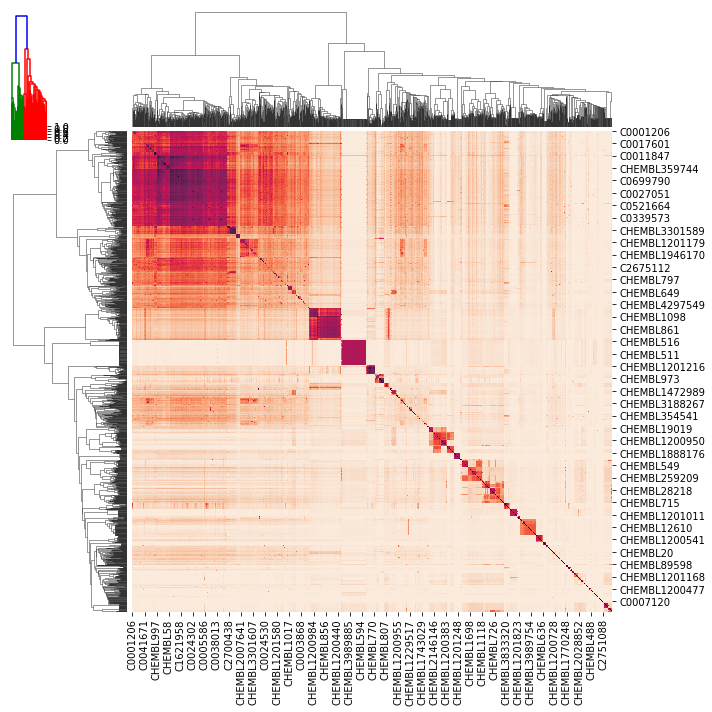

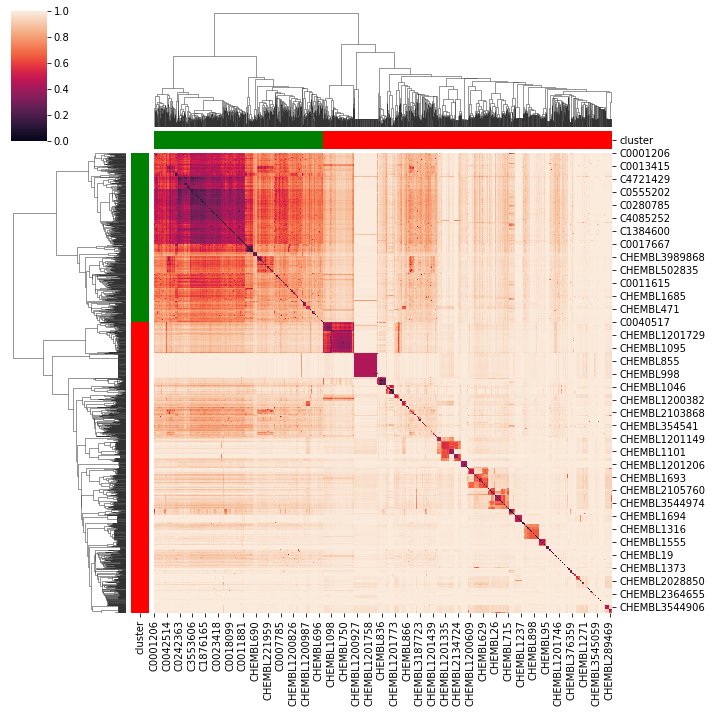

In [ ]:

heatmap_clust(cosine_df=cosine_df_base_50, features=features_base_50, thr=8)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2846: UserWarning: Use the colorbar set_ticks() method instead.
  ax.set_xticks(iv_ticks)


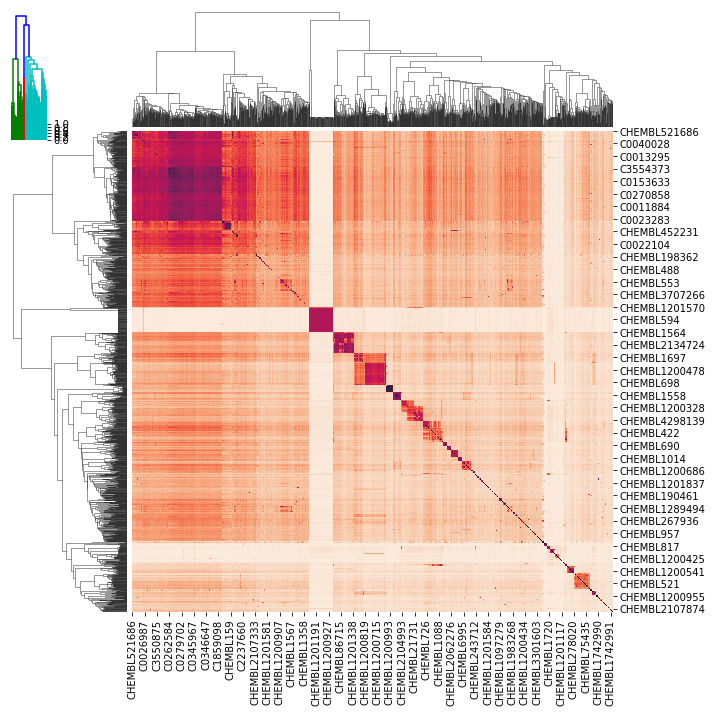

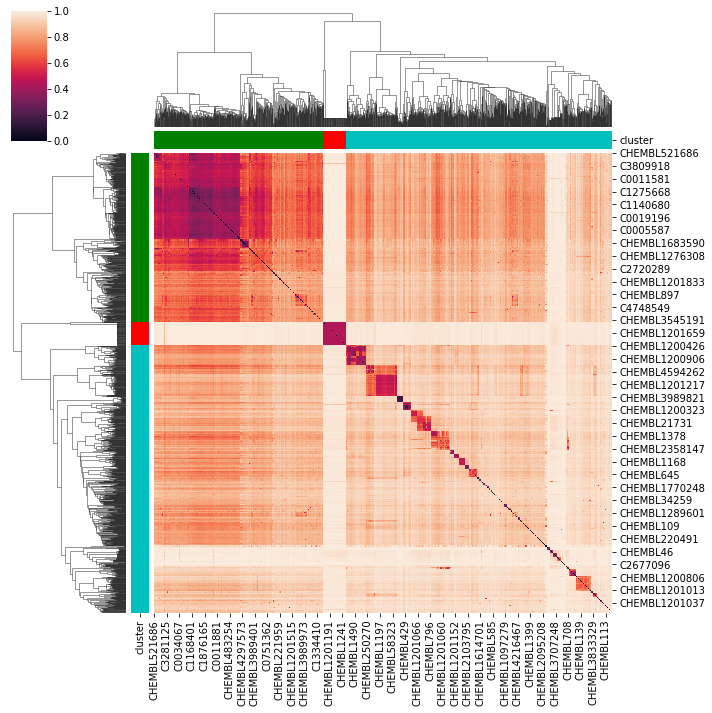

In [ ]:
# cosine_df_adv_50 = cosine_df_adv_50.iloc[:,:-1]
heatmap_clust(cosine_df=cosine_df_adv_50, features=features_adv_50, thr=5.5)

In [ ]:

heatmap_clust(cosine_df=cosine_df_base_red_50, features=features_base_50, thr=8)

In [ ]:
heatmap_clust(cosine_df=cosine_df_adv_red_50, features=features_base_50, thr=8)

In [ ]:
mechanismOfAction = pd.read_pickle('../dat/dfs/mechanismOfAction')
indication = pd.read_pickle('../dat/dfs/indication')
molecule = pd.read_pickle('../dat/dfs/molecule')
fda = pd.read_pickle('../dat/dfs/fda')

In [ ]:
molecule

## look only at drug indication pairs

In [ ]:
# !pip install umap-learn

In [ ]:
paired_cosine_base_50 = cosine_df_base_50.iloc[360:,:360 ].copy()
paired_cosine_adv_50 = cosine_df_adv_50.iloc[364:,:364 ].copy()

# paired_cosine_base_red_50 = cosine_df_base_red_50.iloc[360:,:360 ].copy()
# paired_cosine_adv_red_50 = cosine_df_adv_red_50.iloc[364:,:364 ].copy()


### test if the drug indication pairs are more similar for the approved compared to the non related indication drug pairs

In [ ]:
def t_test(paired_cosine, features):
  paired_features = pd.DataFrame(index=paired_cosine.index, columns=paired_cosine.columns)


  for i in paired_features.index.to_list():
    for j in paired_features.columns.to_list():
      if j in features.loc[i,"ApprovedInd"]:
        paired_features.loc[i,j] = 1
      else:
        paired_features.loc[i,j] = 0
  
  ind = paired_features.sum()>0
  paired_features = paired_features.T[ind].T
  paired_cosine = paired_cosine.T[ind].T

  print(paired_cosine.shape, paired_features.shape)

  ind = paired_features.sum(axis=1)>0

  paired_features = paired_features[ind]
  paired_cosine = paired_cosine[ind]
  print(paired_cosine.shape, paired_features.shape)


  err = 0.00000000000001
  approved_cosine_paires = ((paired_cosine+err)*paired_features).stack()
  ind = approved_cosine_paires>0
  a = approved_cosine_paires[ind]

  approved_cosine_paires = ((paired_cosine+err)*(paired_features-1)*-1).stack()
  ind = approved_cosine_paires>0
  b = approved_cosine_paires[ind]

  a = a.reset_index()
  a["status"] = "approved-pairs" 
  b = b.reset_index()
  b["status"] = "no-pairs"

  box = a.append(b)
  

  axes = box.boxplot(column=[0], by="status", fontsize=26, figsize=(12,10))
  fig = axes.get_figure().gca()
  axes.set_xlabel("")
  fig.set_title("")
 


  from scipy.stats import ttest_ind

  cat1 = box[box['status']=='approved-pairs']
  cat2 = box[box['status']=='no-pairs']

  display(cat1[cat1.loc[:,0] > 0.5].sort_values(0, ascending = False))
  print(cat1[cat1.loc[:,0] > 0.5].shape)
  print(cat2[cat2.loc[:,0] > 0.5].shape)
  # display(cat1)
  print(ttest_ind(cat1[0], cat2[0], equal_var=False))
  print("cosine similarity mean approved-drug pairs {} vs no approved drug pairs {}".format(a.loc[:,0].mean(), b.loc[:,0].mean()))
  
  return paired_features, paired_cosine, cat1, cat2


(649, 137) (649, 137)
(649, 137) (649, 137)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,level_0,level_1,0,status
79,CHEMBL98,C0079773,0.74084,approved-pairs
666,CHEMBL343448,C0079773,0.716387,approved-pairs
135,CHEMBL3137318,C0346153,0.709704,approved-pairs
312,CHEMBL1489,C0026985,0.701032,approved-pairs
137,CHEMBL3137320,C0346153,0.688258,approved-pairs
973,CHEMBL806,C0007112,0.67399,approved-pairs
188,CHEMBL3545368,C0026764,0.671902,approved-pairs
189,CHEMBL483254,C0026764,0.659589,approved-pairs
1050,CHEMBL53463,C0026764,0.64763,approved-pairs
311,CHEMBL1489,C0023466,0.64221,approved-pairs


(44, 4)
(2015, 4)
Ttest_indResult(statistic=6.088290186272754, pvalue=1.5881717209107018e-09)
cosine similarity mean approved-drug pairs 0.14841426476434108 vs no approved drug pairs 0.11815135741802679


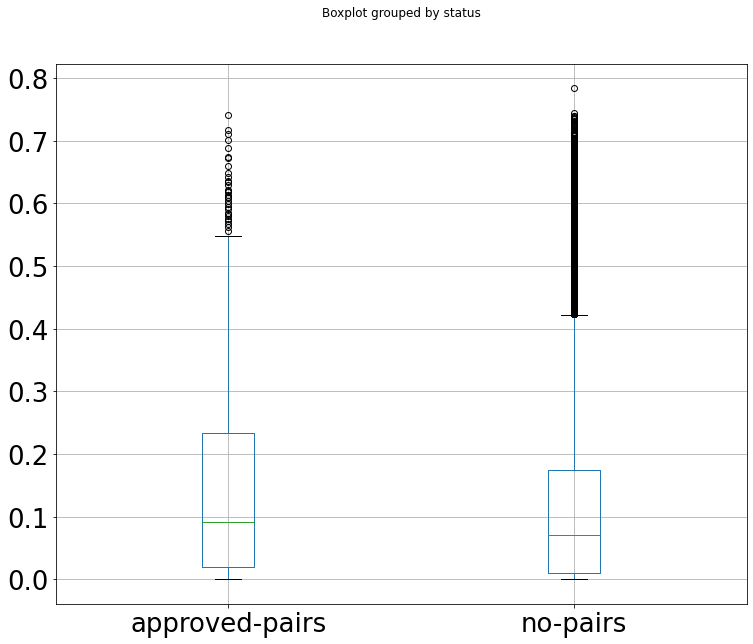

In [ ]:
paired_features_base_50, paired_cosine_base_50,  app_base_50, not_app_base_50  = t_test(paired_cosine=paired_cosine_base_50, features = features_base_50)

In [ ]:

paired_features_base_red_50, paired_cosine_base_red_50,  app_base_red_50, not_app_base_red_50  = t_test(paired_cosine=paired_cosine_base_red_50, features = features_base_50)

In [ ]:

paired_features_adv_red_50, paired_cosine_adv_red_50,  app_adv_red_50, not_app_adv_red_50  = t_test(paired_cosine=paired_cosine_adv_red_50, features = features_adv_50)

(654, 139) (654, 139)
(654, 139) (654, 139)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,level_0,level_1,0,status
192,CHEMBL483254,C0026764,0.678723,approved-pairs
317,CHEMBL1489,C0023466,0.6747,approved-pairs
79,CHEMBL98,C0079773,0.644984,approved-pairs
1065,CHEMBL53463,C0026764,0.635752,approved-pairs
676,CHEMBL343448,C0079773,0.613316,approved-pairs
1064,CHEMBL359744,C0026764,0.60774,approved-pairs
191,CHEMBL3545368,C0026764,0.599933,approved-pairs
725,CHEMBL1200475,C0684249,0.590632,approved-pairs
137,CHEMBL3137318,C0346153,0.584895,approved-pairs
318,CHEMBL1489,C0026985,0.582851,approved-pairs


(33, 4)
(1314, 4)
Ttest_indResult(statistic=4.866213841843067, pvalue=1.3052621716647647e-06)
cosine similarity mean approved-drug pairs 0.20397957933238933 vs no approved drug pairs 0.18433329243010635


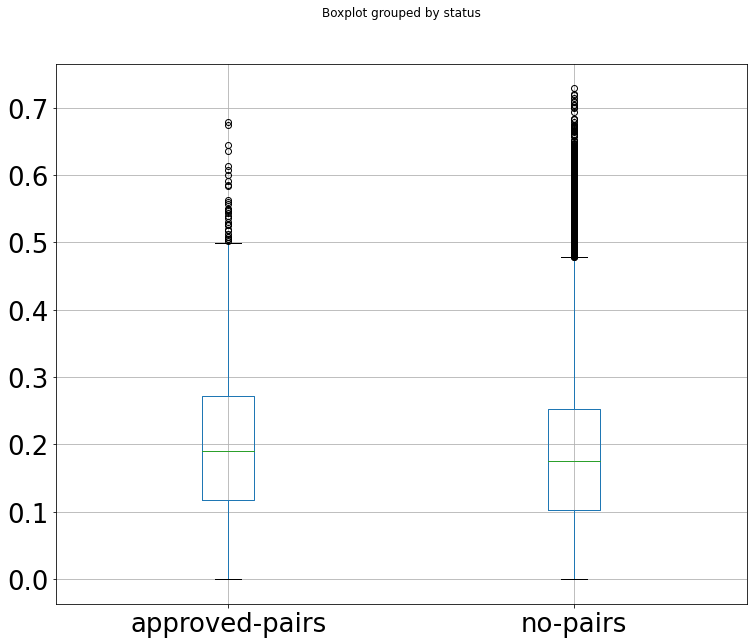

In [ ]:
paired_features_adv_50, paired_cosine_adv_50, app_adv_50, not_app_adv_50 = t_test(paired_cosine=paired_cosine_adv_50, features = features_adv_50)

In [ ]:
base_approved = ((paired_cosine_base_50)*paired_features_base_50).unstack()
ind = base_approved>0
base_approved = base_approved[ind]
base_approved = base_approved.sort_index().reset_index()

base_approved.loc[:,0] = base_approved.loc[:,0].astype(float)



adv_approved = ((paired_cosine_adv_50)*paired_features_adv_50).unstack()
ind = adv_approved>0
adv_approved = adv_approved[ind]
adv_approved = adv_approved.sort_index().reset_index()

adv_approved.loc[:,0] = adv_approved.loc[:,0].astype(float)

In [ ]:
base_approved

,level_0,level_1,0
0,C0001815,CHEMBL1287853,0.341489
1,C0001815,CHEMBL1789941,0.490488
2,C0001815,CHEMBL1795071,0.443659
3,C0001815,CHEMBL4297216,0.385217
4,C0001973,CHEMBL1201293,0.130638
...,...,...,...
881,C4225238,CHEMBL636,0.000037
882,C4225238,CHEMBL660,0.029127
883,C4225238,CHEMBL86715,0.001088
884,C4225238,CHEMBL900,0.052486


In [ ]:
base_approved["shrt_pths"] = None

for i,r in base_approved.iterrows():
  
  sh = base_graph.get_shortest_paths(
    base_graph.vs.find(r["level_1"]),#13489,
    base_graph.vs.find(r["level_0"])
  )
  
  # base_approved.loc[i,"shortest_paths"] = sh
  base_approved.loc[i,"shrt_pths"] = len(sh[0])

# # inverted ranks so one can substract it later
base_approved = base_approved.sort_values(0) 
base_approved["base_rank"] = np.argsort(base_approved.loc[:,0]) + 1

base_approved["ID"] = base_approved.level_0+ "_" + base_approved.level_1
base_approved.set_index("ID", inplace=True)



In [ ]:
adv_approved["shrt_pths"] = None

for i,r in adv_approved.iterrows():
  
  sh = adv_graph.get_shortest_paths(
    adv_graph.vs.find(r["level_1"]),#13489,
    adv_graph.vs.find(r["level_0"])
  )
  
  # base_approved.loc[i,"shortest_paths"] = sh
  adv_approved.loc[i,"shrt_pths"] = len(sh[0])

# inverted ranks so one can substract it later
# adv_approved["adv_rank"] = np.argsort(adv_approved.loc[:,0]) + 1

adv_approved["ID"] = adv_approved.level_0+ "_" + adv_approved.level_1
adv_approved.set_index("ID", inplace=True)

adv_approved

,level_0,level_1,0,shrt_pths
ID,,,,
C0001815_CHEMBL1287853,C0001815,CHEMBL1287853,0.413632,3
C0001815_CHEMBL1789941,C0001815,CHEMBL1789941,0.501707,3
C0001815_CHEMBL1795071,C0001815,CHEMBL1795071,0.448219,3
C0001815_CHEMBL4297216,C0001815,CHEMBL4297216,0.350217,3
C0001973_CHEMBL1201293,C0001973,CHEMBL1201293,0.147088,3
...,...,...,...,...
C4225238_CHEMBL636,C4225238,CHEMBL636,0.048593,6
C4225238_CHEMBL660,C4225238,CHEMBL660,0.102668,6
C4225238_CHEMBL86715,C4225238,CHEMBL86715,0.172815,7


In [ ]:
approved = base_approved.merge(adv_approved, left_index=True, right_index=True)



approved.columns = ["base_dis", "base_drug", "base_sim", "base_shrt_pths", "base_rank", "adv_dis", "adv_drug", "adv_sim", "adv_shrt_pths"]
# inverted ranks so one can substract it later
approved = approved.sort_values("adv_sim")
approved["adv_rank"] = np.argsort(approved.loc[:,"adv_sim"]) + 1


approved["diff_sim"] = approved.adv_sim - approved.base_sim
approved["diff_shrt_pths"] = approved.adv_shrt_pths - approved.base_shrt_pths
approved["diff_ranks"] = approved.adv_rank - approved.base_rank
approved

,base_dis,base_drug,base_sim,base_shrt_pths,base_rank,adv_dis,adv_drug,adv_sim,adv_shrt_pths,adv_rank,diff_sim,diff_shrt_pths,diff_ranks
ID,,,,,,,,,,,,,
C0011860_CHEMBL1703,C0011860,CHEMBL1703,0.029203,3,139,C0011860,CHEMBL1703,0.006947,3,1,-0.022256,0,-138
C0007785_CHEMBL407,C0007785,CHEMBL407,0.001720,5,16,C0007785,CHEMBL407,0.007400,5,2,0.005679,0,-14
C0020473_CHEMBL407,C0020473,CHEMBL407,0.002250,5,21,C0020473,CHEMBL407,0.008517,5,3,0.006267,0,-18
C0011860_CHEMBL407,C0011860,CHEMBL407,0.003530,5,29,C0011860,CHEMBL407,0.011399,5,4,0.007868,0,-25
C0011860_CHEMBL1431,C0011860,CHEMBL1431,0.027489,3,130,C0011860,CHEMBL1431,0.012260,3,5,-0.015228,0,-125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0079773_CHEMBL343448,C0079773,CHEMBL343448,0.716387,4,885,C0079773,CHEMBL343448,0.613316,4,879,-0.103071,0,-6
C0026764_CHEMBL53463,C0026764,CHEMBL53463,0.647630,5,878,C0026764,CHEMBL53463,0.635752,5,880,-0.011878,0,2
C0079773_CHEMBL98,C0079773,CHEMBL98,0.740840,4,886,C0079773,CHEMBL98,0.644984,4,881,-0.095856,0,-5


In [ ]:
approved["distal_drug_disease_pairs"] = "grey"
approved[approved.base_shrt_pths > approved.base_shrt_pths.quantile(0.95)].loc[:,"distal_drug_disease_pairs"] = "green" 
approved

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,base_dis,base_drug,base_sim,base_shrt_pths,base_rank,adv_dis,adv_drug,adv_sim,adv_shrt_pths,adv_rank,diff_sim,diff_shrt_pths,diff_ranks,distal_drug_disease_pairs
ID,,,,,,,,,,,,,,
C0011860_CHEMBL1703,C0011860,CHEMBL1703,0.029203,3,139,C0011860,CHEMBL1703,0.006947,3,1,-0.022256,0,-138,grey
C0007785_CHEMBL407,C0007785,CHEMBL407,0.001720,5,16,C0007785,CHEMBL407,0.007400,5,2,0.005679,0,-14,grey
C0020473_CHEMBL407,C0020473,CHEMBL407,0.002250,5,21,C0020473,CHEMBL407,0.008517,5,3,0.006267,0,-18,grey
C0011860_CHEMBL407,C0011860,CHEMBL407,0.003530,5,29,C0011860,CHEMBL407,0.011399,5,4,0.007868,0,-25,grey
C0011860_CHEMBL1431,C0011860,CHEMBL1431,0.027489,3,130,C0011860,CHEMBL1431,0.012260,3,5,-0.015228,0,-125,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0079773_CHEMBL343448,C0079773,CHEMBL343448,0.716387,4,885,C0079773,CHEMBL343448,0.613316,4,879,-0.103071,0,-6,grey
C0026764_CHEMBL53463,C0026764,CHEMBL53463,0.647630,5,878,C0026764,CHEMBL53463,0.635752,5,880,-0.011878,0,2,grey
C0079773_CHEMBL98,C0079773,CHEMBL98,0.740840,4,886,C0079773,CHEMBL98,0.644984,4,881,-0.095856,0,-5,grey


Text(2.5, -200, 'accept $H_0$')

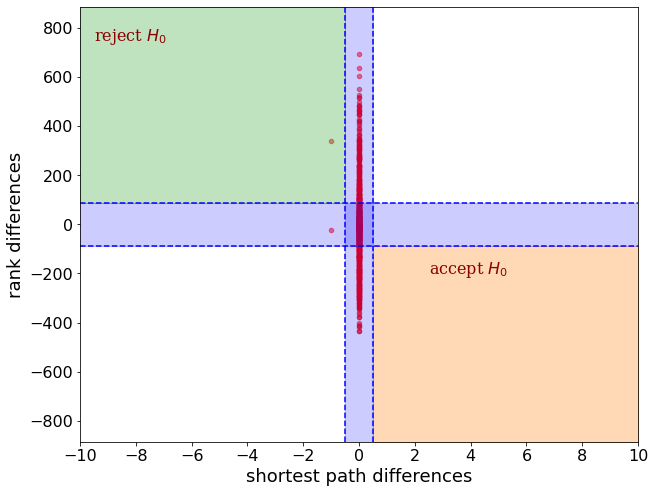

In [ ]:
thr = 0.1
max_rank = approved.base_rank.max()
der = max_rank*thr


approved.plot(kind='scatter',x='diff_shrt_pths',y='diff_ranks', color="red", fontsize=16,
              xlim=[-10,10], ylim=[-max_rank,max_rank], alpha=0.5, figsize=(10,8))

plt.xticks(np.arange(-10, 10+1, 2.0))
plt.xlabel("shortest path differences", fontsize=18)
plt.ylabel("rank differences", fontsize=18)

# line colour is red
plt.axhline(y = der , color = 'b', linestyle = 'dashed')   
plt.axhline(y = -der , color = 'b', linestyle = 'dashed')   

plt.axvline(x = 0.5 , color = 'b', linestyle = 'dashed')   
plt.axvline(x =-0.5 , color = 'b', linestyle = 'dashed')   

x = np.array([-10, -0.5, 0.5, 10])

# y1 = np.array([-max_rank, -max_rank, max_rank, max_rank])
# y2 = np.array([-der, -der, der, der])

y1 = np.array([max_rank, max_rank, -max_rank, -max_rank])
y2 = np.array([der, der, -der, -der])

plt.fill_between(x, y1, y2, where=(y1 > y2), color='C2', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)
plt.axvspan(-0.5, 0.5, alpha=0.2, color='blue')
plt.axhspan(-der, der, alpha=0.2, color='blue')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(-9.5, 750, "reject $H_0$", fontdict=font)
plt.text(2.5, -200, "accept $H_0$", fontdict=font)

# plt.text(12.5, 600, "biological functions\nwas superior", fontdict=font)
# plt.text(12.5, -600, "biological functions\nwas inferior", fontdict=font)


# plt.savefig('../res/diff_rank_vs_shortest_path_relation.png', dpi=300)




In [ ]:
approved[((approved.diff_ranks > 0) & (approved.diff_shrt_pths < 0))]

,base_dis,base_drug,base_sim,base_shrt_pths,base_rank,adv_dis,adv_drug,adv_sim,adv_shrt_pths,adv_rank,diff_sim,diff_shrt_pths,diff_ranks,distal_drug_disease_pairs
ID,,,,,,,,,,,,,,
C0017601_CHEMBL4594250,C0017601,CHEMBL4594250,0.034625,6,160,C0017601,CHEMBL4594250,0.228647,5,499,0.194022,-1,339,grey


In [ ]:
steps_adv = adv_graph.get_shortest_paths(
    adv_graph.vs.find("CHEMBL109"),#CHEMBL109,CHEMBL4594250
    adv_graph.vs.find("C0024713") # C0024713 C0017601
    )[0]


adv_nodes = [adv_graph.vs[i]["name"] for i in  steps_adv]
print(adv_nodes)

steps_base = base_graph.get_shortest_paths(
    base_graph.vs.find("CHEMBL109"),#CHEMBL109,CHEMBL4594250
    base_graph.vs.find("C0024713") # C0024713 C0017601
    )[0]


base_nodes = [base_graph.vs[i]["name"] for i in  steps_base]

print(base_nodes)

['CHEMBL109', '7915', 'GO:0042135', '1312', 'C0024713']
['CHEMBL109', '7915', '7416', '821', '5091', 'C0024713']


In [ ]:
g = pd.DataFrame({"node1": adv_nodes[:-1], "node2": adv_nodes[1:] })
g_base = pd.DataFrame({"node1": base_nodes[:-1], "node2": base_nodes[1:] })

In [ ]:
import networkx as nx

g = pd.DataFrame({"node1": adv_nodes[:-1], "node2": adv_nodes[1:], "node1_type_orig":0, "node1_name":0, "node2_type_orig":0, "node2_name":0 })
g_base = pd.DataFrame({"node1": base_nodes[:-1], "node2": base_nodes[1:], "node1_type_orig":0, "node1_name":0, "node2_type_orig":0, "node2_name":0 })


attr = {}
for i in adv_nodes:
  try:
    ind = adv.node1 == i
    attr[i] = adv[ind].reset_index().loc[0, ["node1", "node1_name", "node1_type_orig"]].tolist()
  except:
    ind = adv.node2 == i
    attr[i] = adv[ind].reset_index().loc[0, ["node2", "node2_name", "node2_type_orig"]].tolist()
  
 
attr

for i,r in g.iterrows():
  g.loc[i,["node1_name", "node1_type_orig"]] = attr[r["node1"]][1:]
  g.loc[i,["node2_name", "node2_type_orig"]] = attr[r["node2"]][1:]

display(g)



attr = {}
for i in base_nodes:
  try:
    ind = base.node1 == i
    attr[i] = base[ind].reset_index().loc[0, ["node1", "node1_name", "node1_type_orig"]].tolist()
  except:
    ind = base.node2 == i
    attr[i] = base[ind].reset_index().loc[0, ["node2", "node2_name", "node2_type_orig"]].tolist()
  
 
attr

for i,r in g_base.iterrows():
  g_base.loc[i,["node1_name", "node1_type_orig"]] = attr[r["node1"]][1:]
  g_base.loc[i,["node2_name", "node2_type_orig"]] = attr[r["node2"]][1:]

g_base




,node1,node2,node1_type_orig,node1_name,node2_type_orig,node2_name
0,CHEMBL109,7915,drug,VALPROIC ACID,protein,ALDH5A1
1,7915,GO:0042135,protein,ALDH5A1,biological_process,neurotransmitter catabolic process
2,GO:0042135,1312,biological_process,neurotransmitter catabolic process,protein,COMT
3,1312,C0024713,protein,COMT,disease,Manic Disorder


,node1,node2,node1_type_orig,node1_name,node2_type_orig,node2_name
0,CHEMBL109,7915,drug,VALPROIC ACID,protein,ALDH5A1
1,7915,7416,protein,ALDH5A1,protein,VDAC1
2,7416,821,protein,VDAC1,protein,CANX
3,821,5091,protein,CANX,protein,PC
4,5091,C0024713,protein,PC,disease,Manic Disorder


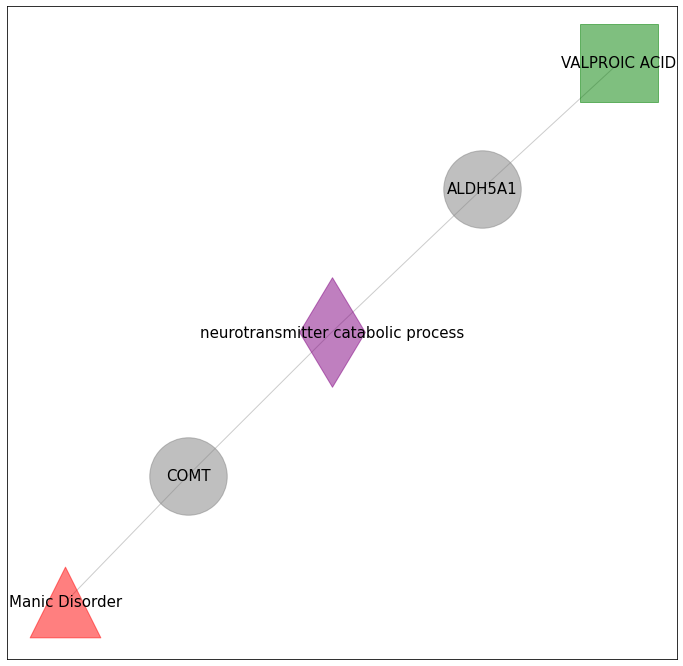

In [ ]:
plt.figure(1,figsize=(12,12)) 
G = nx.from_pandas_edgelist(g, 'node1_name', 'node2_name', 
                            edge_attr=['node1_type_orig', 'node1_name', 'node2_type_orig', 'node2_name'])
colors = {"drug": "green", "protein": "grey", "biological_process": "purple", "disease": "red"}
shape = {"drug": "s", "protein": "o", "biological_process": "d", "disease": "^"}

pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.2)

for i,r in g.iterrows():
  nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                         nodelist=[r["node1_name"]], node_shape=shape[r["node1_type_orig"]], node_color=colors[r["node1_type_orig"]], node_size=6000)
  
nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                         nodelist=[g.loc[3,"node2_name"]], node_shape=shape[g.loc[3,"node2_type_orig"]], node_color=colors[g.loc[3,"node2_type_orig"]], node_size=5000)
  
# nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k in dis_view ], node_shape="^",
#                        node_color=[v for k,v in colors.items() if k in dis_view], node_size=800)

nx.draw_networkx_labels(G, pos, {k:k for k in list(G.nodes) }, font_size=15, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')


plt.savefig('../res/biological_functions_improved_graph.png', dpi=300, format="PNG")

plt.show()


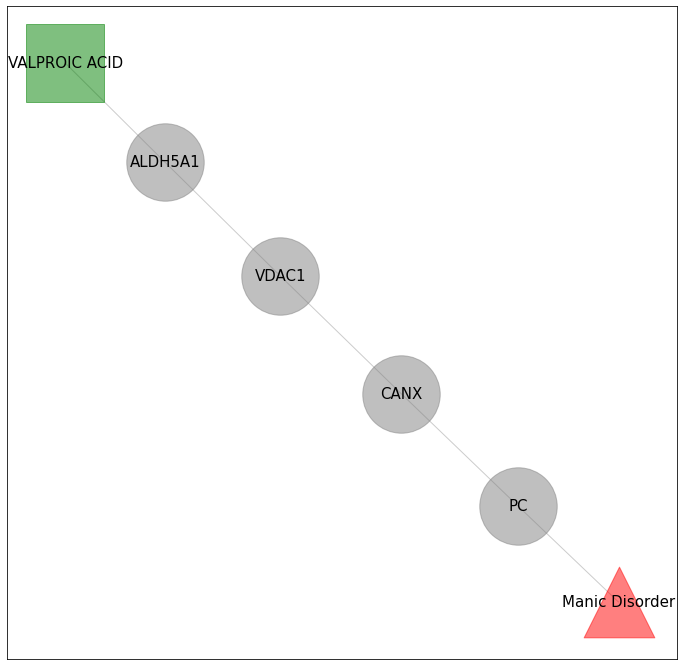

In [ ]:
plt.figure(1,figsize=(12,12)) 
G = nx.from_pandas_edgelist(g_base, 'node1_name', 'node2_name', 
                            edge_attr=['node1_type_orig', 'node1_name', 'node2_type_orig', 'node2_name'])
colors = {"drug": "green", "protein": "grey", "biological_process": "purple", "disease": "red"}
shape = {"drug": "s", "protein": "o", "biological_process": "d", "disease": "^"}

pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.2)

for i,r in g_base.iterrows():
  nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                         nodelist=[r["node1_name"]], node_shape=shape[r["node1_type_orig"]], node_color=colors[r["node1_type_orig"]], node_size=6000)
  
nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                         nodelist=[g.loc[3,"node2_name"]], node_shape=shape[g.loc[3,"node2_type_orig"]], node_color=colors[g.loc[3,"node2_type_orig"]], node_size=5000)
  
# nx.draw_networkx_nodes(G_sub, pos, alpha=0.5, nodelist=[k for k in colors.keys() if k in dis_view ], node_shape="^",
#                        node_color=[v for k,v in colors.items() if k in dis_view], node_size=800)

nx.draw_networkx_labels(G, pos, {k:k for k in list(G.nodes) }, font_size=15, font_color='black')

# nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold')

plt.savefig('../res/without_biological_functions_improved_graph.png', dpi=300, format="PNG")

plt.show()


In [ ]:
set(adv.node1_shape)

{'d', 'o', 's'}

In [ ]:
steps_base = base_graph.get_shortest_paths(
    base_graph.vs.find("CHEMBL109"),
    base_graph.vs.find("C0024713")
    )[0]

[base_graph.vs[i]["name"] for i in  steps_base]

['CHEMBL109', '7915', '7416', '821', '5091', 'C0024713']

In [ ]:
thr = approved.base_rank.quantile([0.1, 0.9]).round(0)

approved[thr[0.9] > approved.base_rank]

approved[thr[0.1] > approved.base_rank].sort_values("base_rank")

,base_dis,base_drug,base_sim,base_shrt_pths,base_rank,adv_dis,adv_drug,adv_sim,adv_shrt_pths,adv_rank,diff_sim,diff_shrt_pths,diff_ranks,distal_drug_disease_pairs
ID,,,,,,,,,,,,,,
C1835047_CHEMBL2105741,C1835047,CHEMBL2105741,0.168332,5,1,C1835047,CHEMBL2105741,0.248036,5,598,0.079704,0,597,grey
C2751802_CHEMBL827,C2751802,CHEMBL827,0.077823,5,2,C2751802,CHEMBL827,0.050627,5,629,-0.027196,0,627,grey
C2751294_CHEMBL1214124,C2751294,CHEMBL1214124,0.009535,5,3,C2751294,CHEMBL1214124,0.035625,5,525,0.026090,0,522,grey
C1956131_CHEMBL3218576,C1956131,CHEMBL3218576,0.129869,5,4,C1956131,CHEMBL3218576,0.235841,5,589,0.105972,0,585,grey
C0206180_CHEMBL1742994,C0206180,CHEMBL1742994,0.416978,4,5,C0206180,CHEMBL1742994,0.427997,4,484,0.011018,0,479,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0023461_CHEMBL608533,C0023461,CHEMBL608533,0.299918,3,84,C0023461,CHEMBL608533,0.380708,3,640,0.080790,0,556,grey
C0020473_CHEMBL1201753,C0020473,CHEMBL1201753,0.212493,5,85,C0020473,CHEMBL1201753,0.253969,5,128,0.041475,0,43,grey
C0678222_CHEMBL554,C0678222,CHEMBL554,0.296241,3,86,C0678222,CHEMBL554,0.288625,3,699,-0.007616,0,613,grey


In [ ]:
approved.base_rank.describe()[["min", "max"]]
approved.adv_rank.describe()[["min", "max"]]

min      1.0
max    883.0
Name: adv_rank, dtype: float64

In [ ]:
approved[approved.diff_shrt_pths < 0]

,base_dis,base_drug,base_sim,base_shrt_pths,base_rank,adv_dis,adv_drug,adv_sim,adv_shrt_pths,adv_rank,diff_sim,diff_shrt_pths,diff_ranks
ID,,,,,,,,,,,,,
C0017601_CHEMBL4594250,C0017601,CHEMBL4594250,0.034625,6,415,C0017601,CHEMBL4594250,0.228647,5,87,0.194022,-1,-328
C0024713_CHEMBL109,C0024713,CHEMBL109,0.192344,6,876,C0024713,CHEMBL109,0.252759,5,365,0.060416,-1,-511


igraph.Vertex(<igraph.Graph object at 0x7f9146047050>, 11472, {'name': 'C0001815'})

## similarly we can check the enrichment of ranks of drug indication pairs

In [ ]:
def rank_assesment(paired_features, paired_cosine, cutoff= 200):
  paired_rank = paired_features.copy()

  for j in paired_cosine.columns:
    ind = paired_cosine.sort_values(j).index.to_list()
    paired_rank.loc[ind,j] = list(range(1,len(paired_rank)+1))

  paired_features = paired_features.loc[paired_cosine.index.to_list(),:]
  paired_rank = paired_rank.loc[paired_cosine.index.to_list(),:]

  app_rank = ((paired_rank)*paired_features).unstack()
  ind = app_rank>0
  a_r = app_rank[ind]
  a_r = a_r.sort_index().reset_index()

  a_r.loc[:,0] = a_r.loc[:,0].astype(int)
  a_r_stats = a_r.groupby("level_0").agg({0:[list, "mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median")



  no_app_rank = (paired_rank*(paired_features-1)*-1).unstack()
  ind = no_app_rank>0
  b_r = no_app_rank[ind]
  b_r = b_r.sort_index().reset_index()

  b_r.loc[:,0] = b_r.loc[:,0].astype(int)
  b_r_stats = b_r.groupby("level_0").agg({0:[list, "mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median")

  RANKS_stats = a_r_stats.merge(b_r_stats, left_index=True, right_index=True)

  plt.bar(x=RANKS_stats.index, height = RANKS_stats.median_x-RANKS_stats.median_y)

  plt.title("rank differences between approved drugs and non approved drugs")
  plt.xlabel("diseases")
  plt.ylabel("rank differences - negative ranks are superior")

  return RANKS_stats[RANKS_stats.median_x-RANKS_stats.median_y < cutoff]


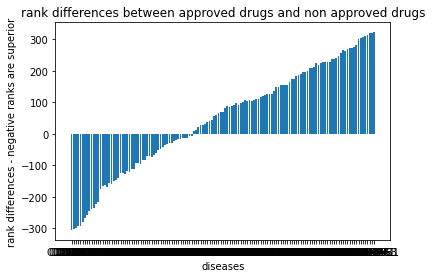

In [ ]:
RANKS_stats_base_50 = rank_assesment(paired_features=paired_features_base_50, paired_cosine=paired_cosine_base_50, cutoff=0)

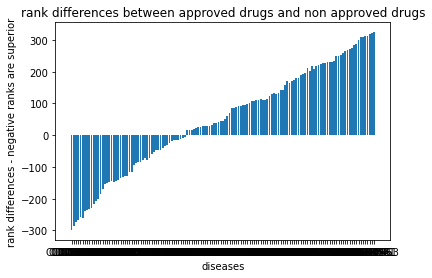

In [ ]:
RANKS_stats_base_red_50 = rank_assesment(paired_features=paired_features_base_red_50, paired_cosine=paired_cosine_base_red_50, cutoff=0)

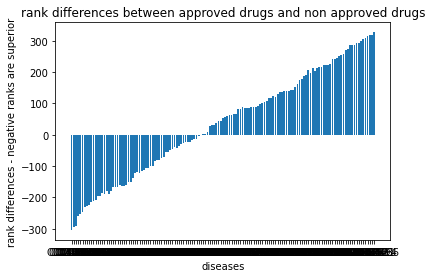

In [ ]:
RANKS_stats_adv_50 = rank_assesment(paired_features=paired_features_adv_50, paired_cosine=paired_cosine_adv_50, cutoff=0)

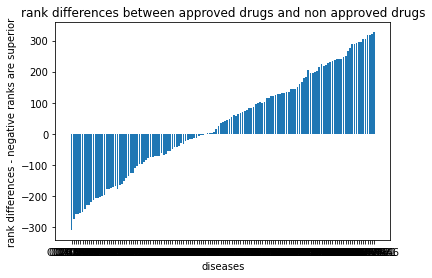

In [ ]:
RANKS_stats_adv_red_50 = rank_assesment(paired_features=paired_features_adv_red_50, paired_cosine=paired_cosine_adv_red_50, cutoff=0)

In [ ]:
paired_cosine_new_base_50 = paired_cosine_base_50.loc[:,RANKS_stats_base_50.index]
paired_features_new_base_50 = paired_features_base_50.loc[:,RANKS_stats_base_50.index]

paired_cosine_new_base_red_50 = paired_cosine_base_red_50.loc[:,RANKS_stats_base_red_50.index]
paired_features_new_base_red_50 = paired_features_base_red_50.loc[:,RANKS_stats_base_red_50.index]


paired_cosine_new_adv_50 = paired_cosine_adv_50.loc[:,RANKS_stats_adv_50.index]
paired_features_new_adv_50 = paired_features_adv_50.loc[:,RANKS_stats_adv_50.index]

paired_cosine_new_adv_red_50 = paired_cosine_adv_red_50.loc[:,RANKS_stats_adv_red_50.index]
paired_features_new_adv_red_50 = paired_features_adv_red_50.loc[:,RANKS_stats_adv_red_50.index]


## run UMAP on zoomed dataset

In [ ]:
!pip install umap-learn

def UMAP(paired_cosine_new, neigbors = 30, min_dist=0.1):
  import umap
  pipeline = Pipeline([('scaling', StandardScaler()), ('umap', umap.UMAP(n_neighbors=neigbors,
      min_dist=min_dist, 
      n_components=2,
      random_state=42))])

  embedding = pipeline.fit_transform(paired_cosine_new)
  print(embedding.shape)

  from sklearn.cluster import DBSCAN
  db = DBSCAN()
  y_pred = db.fit_predict(embedding)


  plt.figure(figsize=(8, 8), dpi=80) 
  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=y_pred, cmap='Set3')
  cbar = plt.colorbar()
  mn = np.min(y_pred)
  mx = np.max(y_pred)
  cbar.set_ticks([i for i in range(mn,mx+1)])
  cbar.set_ticklabels([i for i in range(mn,mx+1)])

  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP projection of dataset', fontsize=24)

  return y_pred


(649, 2)


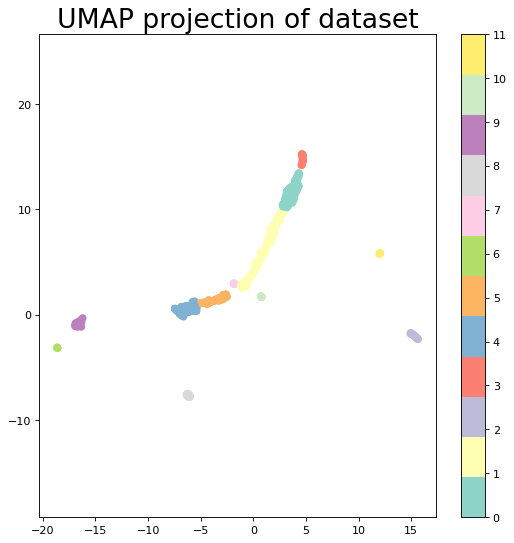

In [ ]:
clust_base_50 = UMAP(paired_cosine_new_base_50, neigbors=30, min_dist=0.0)

(649, 2)


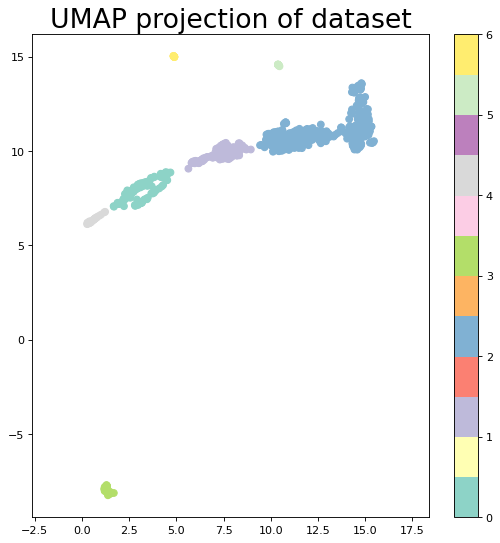

In [ ]:
clust_base_red_50 = UMAP(paired_cosine_new_base_red_50, neigbors=30, min_dist=0.0)

(654, 2)


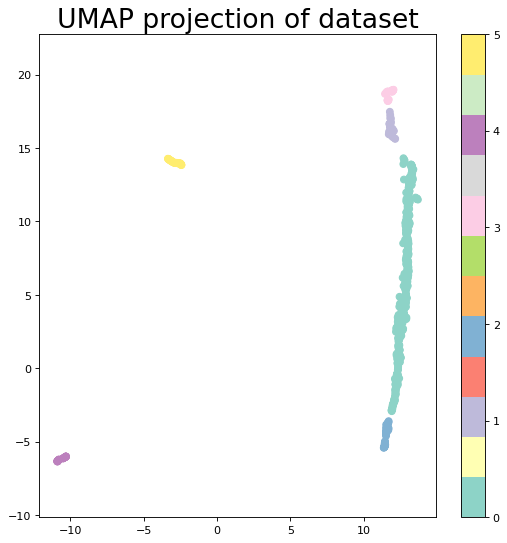

In [ ]:
clust_adv_50 = UMAP(paired_cosine_new_adv_50, neigbors=30, min_dist=0.0)

(654, 2)


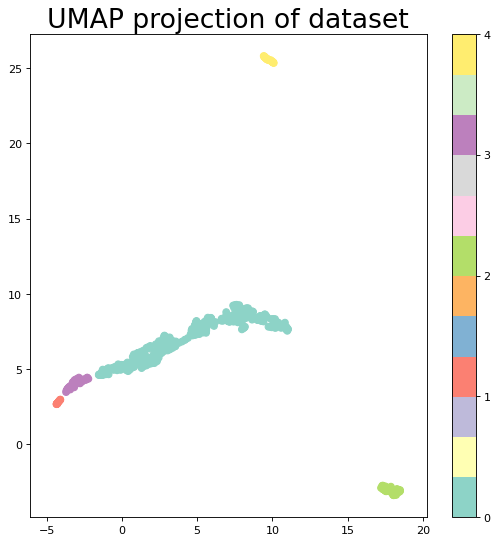

In [ ]:
clust_adv_red_50 = UMAP(paired_cosine_new_adv_red_50, neigbors=30, min_dist=0.0)

In [ ]:
# https://vitalv.github.io/projects/enrichment-and-clustering-methods-on-a-proteomics-dataset.html
# #Silhouette coefficients and cluster abundance plots ------------------------------------------------------------------------
# import matplotlib.cm as cm
# from sklearn.metrics import silhouette_score, silhouette_samples
# range_n_clusters = range(2,7)
# for n_clusters in range_n_clusters:
#     fig, ax1 = plt.subplots(figsize=(16,8))
#     #fig, (ax1, ax2) = plt.subplots(1, 2) # Create a subplot with 1 row and 2 columns
#     ax1.set_xlim([-0.2, 1.5]) 
#     ax1.set_ylim([0, len(matrix) + (n_clusters + 1) * 10]) #inserts blank space between silhouette plots of individual cluster
#     # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++')#, random_state=10) 
#     cluster_labels = kmeans.fit_predict(matrix)
#     silhouette_avg = silhouette_score(matrix, cluster_labels) # The silhouette_score gives the average value for all the samples.
#     print "n_clusters:", n_clusters, "Average silhouette_score is :", silhouette_avg
#     sample_silhouette_values = silhouette_samples(matrix, cluster_labels) # Compute the silhouette scores for each sample
#     cluster_idxs = {}
#     y_lower = 10
#     for i in range(n_clusters):
#         c = cluster_labels == cluster
#         cluster_idxs[cluster] = np.where(c == True)
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]# Aggregate silhouette scores
#         ith_cluster_silhouette_values.sort() # and sort them
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i
#         color = cm.spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1)) # Label the silhouette plots with their cluster numbers at the middle
#         y_lower = y_upper + 10  # # Compute the new y_lower for next plot 10 for the 0 samples
#         position=range(n_clusters)[-(i+1)]*2+2
#         ax_n = fig.add_subplot(n_clusters,2,position) #add_subplot(rows,columns,positionInGrid)
#         ax_n.text(-0.05,0,str(i+1))
#         idxs = list(cluster_idxs[i][0])
#         cluster_abundance(idxs, ax=ax_n)
#     ax1.set_xlabel("Silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")# Vertical line for average silhouette score of all the values
#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4])

In [ ]:
def enrich_features(features, clusters, df):
    
    feat = features.loc[df.index,:].copy()
    feat["clusters"] = clusters
    feat.IndicationClass = [i.split(";") for i in feat.IndicationClass]
    feat = feat.loc[df.index,:].explode("IndicationClass")
    
    display(feat)
    return feat

enrich_base = enrich_features(features_base_50, clusters=clust_base_50, df=paired_cosine_new_base_50)

,entity,IndicationClass,FreqApprovedInd,ApprovedInd,clusters
CHEMBL502835,drug,C08,2.0,"['C0027651', 'C1800706']",0
CHEMBL2396661,drug,,5.0,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",1
CHEMBL1240,drug,,NaN,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",1
CHEMBL1100,drug,C10,1.0,['C0014544'],0
CHEMBL220492,drug,C10,2.0,"['C0014544', 'C0338489']",2
...,...,...,...,...,...
CHEMBL359744,drug,C20,1.0,['C0026764'],3
CHEMBL359744,drug,C15,1.0,['C0026764'],3
CHEMBL359744,drug,C14,1.0,['C0026764'],3
CHEMBL53463,drug,,3.0,"['C0027651', 'C0026764', 'C0347071']",3


In [ ]:
enrich_base_red = enrich_features(features_base_50, clusters=clust_base_red_50, df=paired_cosine_new_base_red_50)

,entity,IndicationClass,FreqApprovedInd,ApprovedInd,clusters
CHEMBL502835,drug,C08,2.0,"['C0027651', 'C1800706']",0
CHEMBL2396661,drug,,5.0,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",1
CHEMBL1240,drug,,NaN,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",2
CHEMBL1100,drug,C10,1.0,['C0014544'],0
CHEMBL220492,drug,C10,2.0,"['C0014544', 'C0338489']",3
...,...,...,...,...,...
CHEMBL359744,drug,C20,1.0,['C0026764'],4
CHEMBL359744,drug,C15,1.0,['C0026764'],4
CHEMBL359744,drug,C14,1.0,['C0026764'],4
CHEMBL53463,drug,,3.0,"['C0027651', 'C0026764', 'C0347071']",4


In [ ]:
enrich_adv = enrich_features(features_adv_50, clusters=clust_adv_50, df=paired_cosine_new_adv_50)

,entity,IndicationClass,FreqApprovedInd,ApprovedInd,clusters
CHEMBL502835,drug,C08,2.0,"['C0027651', 'C1800706']",0
CHEMBL2396661,drug,,5.0,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",0
CHEMBL1240,drug,,NaN,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",0
CHEMBL1100,drug,C10,1.0,['C0014544'],0
CHEMBL220492,drug,C10,2.0,"['C0014544', 'C0338489']",1
...,...,...,...,...,...
CHEMBL359744,drug,C20,1.0,['C0026764'],2
CHEMBL359744,drug,C15,1.0,['C0026764'],2
CHEMBL359744,drug,C14,1.0,['C0026764'],2
CHEMBL53463,drug,,3.0,"['C0027651', 'C0026764', 'C0347071']",2


In [ ]:

enrich_adv_red = enrich_features(features_adv_50, clusters=clust_adv_red_50, df=paired_cosine_new_adv_red_50)

,entity,IndicationClass,FreqApprovedInd,ApprovedInd,clusters
CHEMBL502835,drug,C08,2.0,"['C0027651', 'C1800706']",0
CHEMBL2396661,drug,,5.0,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",0
CHEMBL1240,drug,,NaN,"['C0027651', 'C0346153', 'MONDO_0007254', 'C06...",0
CHEMBL1100,drug,C10,1.0,['C0014544'],0
CHEMBL220492,drug,C10,2.0,"['C0014544', 'C0338489']",0
...,...,...,...,...,...
CHEMBL359744,drug,C20,1.0,['C0026764'],1
CHEMBL359744,drug,C15,1.0,['C0026764'],1
CHEMBL359744,drug,C14,1.0,['C0026764'],1
CHEMBL53463,drug,,3.0,"['C0027651', 'C0026764', 'C0347071']",1


In [ ]:
# test.reset_index().rename(columns={"index": "drugs"}).pivot_table(values="drugs", index="IndicationClass", columns="clusters", aggfunc="count")

clusters,0,1,2,3,4,5,6,7,8,9,10,11
IndicationClass,,,,,,,,,,,,
,50.0,90.0,9.0,14.0,28.0,20.0,NaN,NaN,7.0,23.0,3.0,3.0
C01,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
C04,34.0,13.0,2.0,7.0,1.0,4.0,NaN,NaN,NaN,5.0,1.0,NaN
C05,2.0,1.0,NaN,6.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,3.0
C06,2.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
C08,10.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
C09,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN
C10,3.0,6.0,10.0,1.0,7.0,5.0,NaN,NaN,NaN,NaN,7.0,NaN
C11,3.0,13.0,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

app_base_50.loc[:,0]  = app_base_50.loc[:,0].astype(float)
not_app_base_50.loc[:,0]  = not_app_base_50.loc[:,0].astype(float)

# display(app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

# display(not_app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

stats_base_50 = app_base_50.append(not_app_base_50).set_index("level_0").merge(enrich_base, left_index=True, right_index=True, how="inner").rename(columns={0: "values"})

stats_base_50.groupby(["clusters", "status"]).agg({"values": ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2)

mean  median      sum
clusters status                               
3        approved-pairs  0.57    0.57    45.58
         no-pairs        0.44    0.48  2946.37
0        approved-pairs  0.34    0.34    96.10
         no-pairs        0.28    0.30  6661.13
10       approved-pairs  0.17    0.21     2.18
1        approved-pairs  0.13    0.13    47.31
         no-pairs        0.11    0.11  3545.33
2        approved-pairs  0.10    0.10     6.34
6        approved-pairs  0.10    0.10     1.83
2        no-pairs        0.09    0.09   541.41
10       no-pairs        0.07    0.06   116.62
11       no-pairs        0.05    0.04   154.26
7        approved-pairs  0.05    0.04     0.50
5        approved-pairs  0.05    0.04     5.75
         no-pairs        0.04    0.03   396.44
11       approved-pairs  0.05    0.03     1.21
7        no-pairs        0.03    0.03    37.52
4        approved-pairs  0.01    0.00     2.53
         no-pairs        0.01    0.00   117.51
6        no-pairs        0.00    0.00     0.91
8        approved-pairs  0.00    0.00     0.21
         no-pairs        0.00    0.00    11.59
9        approved-pairs  0.01    0.00     1.20
         no-pairs        0.00    0.00     6.61

In [ ]:

app_base_red_50.loc[:,0]  = app_base_red_50.loc[:,0].astype(float)
not_app_base_red_50.loc[:,0]  = not_app_base_red_50.loc[:,0].astype(float)

# display(app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

# display(not_app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

stats_base_red_50 = app_base_red_50.append(not_app_base_red_50).set_index("level_0").merge(enrich_base_red, left_index=True, right_index=True, how="inner").rename(columns={0: "values"})

stats_base_red_50.groupby(["clusters", "status"]).agg({"values": ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2)

mean  median      sum
clusters status                               
4        approved-pairs  0.57    0.57    44.24
         no-pairs        0.44    0.48  2876.97
0        approved-pairs  0.34    0.33    98.32
         no-pairs        0.29    0.30  6802.26
5        approved-pairs  0.16    0.21     2.09
1        approved-pairs  0.17    0.17    30.47
         no-pairs        0.15    0.15  2336.03
3        approved-pairs  0.10    0.10     6.13
         no-pairs        0.09    0.09   509.55
5        no-pairs        0.06    0.05   100.28
6        no-pairs        0.05    0.04   144.26
2        approved-pairs  0.05    0.03    29.26
6        approved-pairs  0.05    0.03     1.42
2        no-pairs        0.04    0.03  1794.09

In [ ]:

app_adv_50.loc[:,0]  = app_adv_50.loc[:,0].astype(float)
not_app_adv_50.loc[:,0]  = not_app_adv_50.loc[:,0].astype(float)

# display(app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

# display(not_app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

stats_adv_50 = app_adv_50.append(not_app_adv_50).set_index("level_0").merge(enrich_adv, left_index=True, right_index=True, how="inner").rename(columns={0: "values"})

stats_adv_50.groupby(["clusters", "status"]).agg({"values": ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2)

mean  median       sum
clusters status                                
2        approved-pairs  0.47    0.46     62.96
         no-pairs        0.40    0.42   4761.68
0        approved-pairs  0.22    0.21    198.13
         no-pairs        0.20    0.20  15952.96
5        approved-pairs  0.15    0.16      9.75
         no-pairs        0.15    0.15    902.78
1        approved-pairs  0.08    0.08      7.85
         no-pairs        0.06    0.07    531.23
3        no-pairs        0.00    0.00     19.82
         approved-pairs  0.03    0.00      1.99
4        approved-pairs  0.00    0.00      0.24
         no-pairs        0.00    0.00     11.86

In [ ]:

app_adv_red_50.loc[:,0]  = app_adv_red_50.loc[:,0].astype(float)
not_app_adv_red_50.loc[:,0]  = not_app_adv_red_50.loc[:,0].astype(float)

# display(app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

# display(not_app_50.set_index("level_0").merge(test, left_index=True, right_index=True).groupby("clusters").agg({0: ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2))

stats_adv_red_50 = app_adv_red_50.append(not_app_adv_red_50).set_index("level_0").merge(enrich_adv_red, left_index=True, right_index=True, how="inner").rename(columns={0: "values"})

stats_adv_red_50.groupby(["clusters", "status"]).agg({"values": ["mean", "median", "sum"]}).droplevel(0, axis=1).sort_values("median", ascending=False).round(2)

mean  median       sum
clusters status                                
1        approved-pairs  0.56    0.58     18.46
         no-pairs        0.47    0.50   1737.79
3        approved-pairs  0.43    0.42     59.26
         no-pairs        0.37    0.39   4373.72
0        approved-pairs  0.20    0.20    193.07
         no-pairs        0.19    0.19  15413.16
4        approved-pairs  0.17    0.18     10.41
         no-pairs        0.16    0.17    954.31
2        approved-pairs  0.03    0.02      3.38
         no-pairs        0.01    0.01    101.39

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('values ~ C(clusters) + C(status) + C(clusters):C(status)', data=stats_base_50).fit()
display(sm.stats.anova_lm(model, typ=2))

# !pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=stats_base_50, res_var='values', xfac_var=['status',"clusters"], anova_model='values~C(status) + C(clusters) + C(clusters):C(status)')

ind = [True if ((r["group1"][0] == "approved-pairs") and (r["group2"][0] == "no-pairs") and (r["group1"][1] == r["group2"][1]))  else False for i,r in res.tukey_summary.iterrows()]
res.tukey_summary[ind].sort_values(["Diff", "p-value"], ascending=[False,True])

,sum_sq,df,F,PR(>F)
C(clusters),1845.443357,11.0,28551.302980,0.000000e+00
C(status),1.126934,1.0,191.785722,1.403778e-43
C(clusters):C(status),1.564018,11.0,24.197305,1.312825e-50
Residual,681.704634,116015.0,NaN,NaN


,group1,group2,Diff,Lower,Upper,q-value,p-value
151,"(approved-pairs, 3)","(no-pairs, 3)",0.138751,0.104968,0.172534,21.127915,0.001000
182,"(approved-pairs, 10)","(no-pairs, 10)",0.101919,0.017076,0.186761,6.179537,0.002962
134,"(approved-pairs, 6)","(no-pairs, 6)",0.101304,0.032053,0.170555,7.525233,0.001000
34,"(approved-pairs, 0)","(no-pairs, 0)",0.056954,0.039033,0.074875,16.348422,0.001000
209,"(approved-pairs, 7)","(no-pairs, 7)",0.036402,-0.133227,0.206031,1.103939,0.900000
116,"(approved-pairs, 2)","(no-pairs, 2)",0.024391,-0.024656,0.073438,2.558184,0.900000
97,"(approved-pairs, 1)","(no-pairs, 1)",0.017578,0.000664,0.034493,5.345975,0.030680
77,"(approved-pairs, 5)","(no-pairs, 5)",0.015832,-0.016269,0.047934,2.537084,0.900000
196,"(approved-pairs, 9)","(no-pairs, 9)",0.013097,-0.019032,0.045227,2.096983,0.900000
56,"(approved-pairs, 4)","(no-pairs, 4)",0.008566,-0.020713,0.037844,1.504981,0.900000


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('values ~ C(clusters) + C(status) + C(clusters):C(status)', data=stats_base_red_50).fit()
display(sm.stats.anova_lm(model, typ=2))

# !pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=stats_base_red_50, res_var='values', xfac_var=['status',"clusters"], anova_model='values~C(status) + C(clusters) + C(clusters):C(status)')

ind = [True if ((r["group1"][0] == "approved-pairs") and (r["group2"][0] == "no-pairs") and (r["group1"][1] == r["group2"][1]))  else False for i,r in res.tukey_summary.iterrows()]
res.tukey_summary[ind].sort_values(["Diff", "p-value"], ascending=[False,True])

,sum_sq,df,F,PR(>F)
C(clusters),1651.583628,6.0,47951.369330,0.000000e+00
C(status),1.142156,1.0,198.965218,3.867582e-45
C(clusters):C(status),1.128516,6.0,32.764841,1.103751e-39
Residual,595.540490,103744.0,NaN,NaN


,group1,group2,Diff,Lower,Upper,q-value,p-value
61,"(approved-pairs, 4)","(no-pairs, 4)",0.129932,0.098766,0.161097,19.774377,0.001000
69,"(approved-pairs, 5)","(no-pairs, 5)",0.101406,0.024166,0.178646,6.226998,0.001000
19,"(approved-pairs, 0)","(no-pairs, 0)",0.054476,0.038312,0.070641,15.984700,0.001000
42,"(approved-pairs, 3)","(no-pairs, 3)",0.028658,-0.015988,0.073304,3.044504,0.641035
31,"(approved-pairs, 1)","(no-pairs, 1)",0.019248,-0.002006,0.040501,4.295479,0.125000
6,"(approved-pairs, 2)","(no-pairs, 2)",0.017596,0.004393,0.030799,6.321318,0.001000
52,"(approved-pairs, 6)","(no-pairs, 6)",0.002967,-0.050571,0.056505,0.262879,0.900000


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('values ~ C(clusters) + C(status) + C(clusters):C(status)', data=stats_adv_50).fit()
display(sm.stats.anova_lm(model, typ=2))

# !pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=stats_adv_50, res_var='values', xfac_var=['status',"clusters"], anova_model='values~C(status) + C(clusters) + C(clusters):C(status)')

ind = [True if ((r["group1"][0] == "approved-pairs") and (r["group2"][0] == "no-pairs") and (r["group1"][1] == r["group2"][1]))  else False for i,r in res.tukey_summary.iterrows()]
res.tukey_summary[ind].sort_values(["Diff", "p-value"], ascending=[False,True])

,sum_sq,df,F,PR(>F)
C(clusters),1159.155476,5.0,36507.653339,0.000000e+00
C(status),0.553707,1.0,87.195090,9.994679e-21
C(clusters):C(status),0.354098,5.0,11.152329,9.152266e-11
Residual,755.496630,118972.0,NaN,NaN


,group1,group2,Diff,Lower,Upper,q-value,p-value
50,"(approved-pairs, 2)","(no-pairs, 2)",0.069378,0.045669,0.093087,13.524767,0.001000
43,"(approved-pairs, 3)","(no-pairs, 3)",0.046374,0.002943,0.089804,4.935094,0.024414
26,"(approved-pairs, 1)","(no-pairs, 1)",0.021664,-0.010382,0.053710,3.124471,0.536627
16,"(approved-pairs, 0)","(no-pairs, 0)",0.018373,0.008644,0.028102,8.728034,0.001000
35,"(approved-pairs, 5)","(no-pairs, 5)",0.018248,-0.025816,0.062312,1.914045,0.900000
5,"(approved-pairs, 4)","(no-pairs, 4)",0.001775,-0.031023,0.034572,0.250075,0.900000


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('values ~ C(clusters) + C(status) + C(clusters):C(status)', data=stats_adv_red_50).fit()
display(sm.stats.anova_lm(model, typ=2))

# !pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=stats_adv_red_50, res_var='values', xfac_var=['status',"clusters"], anova_model='values~C(status) + C(clusters) + C(clusters):C(status)')

ind = [True if ((r["group1"][0] == "approved-pairs") and (r["group2"][0] == "no-pairs") and (r["group1"][1] == r["group2"][1]))  else False for i,r in res.tukey_summary.iterrows()]
res.tukey_summary[ind].sort_values(["Diff", "p-value"], ascending=[False,True])

,sum_sq,df,F,PR(>F)
C(clusters),910.343938,4.0,33367.868023,0.000000e+00
C(status),0.639835,1.0,93.810456,3.542391e-22
C(clusters):C(status),0.404464,4.0,14.825261,4.097825e-12
Residual,766.673428,112407.0,NaN,NaN


,group1,group2,Diff,Lower,Upper,q-value,p-value
34,"(approved-pairs, 1)","(no-pairs, 1)",0.096074,0.047510,0.144639,8.851383,0.001000
28,"(approved-pairs, 3)","(no-pairs, 3)",0.061999,0.038730,0.085269,11.921223,0.001000
4,"(approved-pairs, 2)","(no-pairs, 2)",0.023249,-0.006737,0.053235,3.469062,0.294675
21,"(approved-pairs, 4)","(no-pairs, 4)",0.019102,-0.025253,0.063457,1.926922,0.900000
13,"(approved-pairs, 0)","(no-pairs, 0)",0.018608,0.009092,0.028124,8.749023,0.001000


## test enrichment for Indication Class

In [ ]:
res = stat()
res.tukey_hsd(df=stats_base_50, res_var='values', xfac_var=['status',"IndicationClass"], anova_model='values~C(status) + C(IndicationClass) + C(IndicationClass):C(status)')
res.tukey_summary
ind = [True if ((r["group1"][0] == "approved-pairs") and (r["group2"][0] == "no-pairs") and (r["group1"][1] == r["group2"][1]))  else False for i,r in res.tukey_summary.iterrows()]
res.tukey_summary[ind].sort_values(["p-value"])

,group1,group2,Diff,Lower,Upper,q-value,p-value
21,"(approved-pairs, )","(no-pairs, )",0.041011,0.013168,0.068854,8.191803,0.001000
589,"(approved-pairs, C04)","(no-pairs, C04)",0.063507,0.007585,0.119430,6.315774,0.006083
187,"(approved-pairs, C18)","(no-pairs, C18)",0.082092,0.007926,0.156257,6.155863,0.009851
471,"(approved-pairs, C05)","(no-pairs, C05)",0.097006,-0.005526,0.199538,5.261760,0.101613
106,"(approved-pairs, C10)","(no-pairs, C10)",0.057365,-0.028477,0.143207,3.716557,0.809911
667,"(approved-pairs, C15)","(no-pairs, C15)",0.059612,-0.056676,0.175900,2.850972,0.900000
642,"(approved-pairs, C25)","(no-pairs, C25)",0.080400,-0.204171,0.364971,1.571292,0.900000
616,"(approved-pairs, C17)","(no-pairs, C17)",0.044265,-0.059867,0.148398,2.364112,0.900000
561,"(approved-pairs, C09)","(no-pairs, C09)",0.013617,-0.105459,0.132694,0.636007,0.900000
532,"(approved-pairs, C20)","(no-pairs, C20)",0.001722,-0.071290,0.074735,0.131205,0.900000


In [ ]:
stats_base_50.sort_values("values",ascending=False).round(2)

,level_1,values,status,entity,IndicationClass,FreqApprovedInd,ApprovedInd,clusters
CHEMBL98,C0026985,0.78,no-pairs,drug,,3.0,"['C0027651', 'C0079773', 'C0347071']",3
CHEMBL98,C0007112,0.74,no-pairs,drug,,3.0,"['C0027651', 'C0079773', 'C0347071']",3
CHEMBL98,C0079773,0.74,approved-pairs,drug,,3.0,"['C0027651', 'C0079773', 'C0347071']",3
CHEMBL1201129,C0025149,0.74,no-pairs,drug,,NaN,"['C0149871', 'HP_0004419']",3
CHEMBL1201129,C0026985,0.74,no-pairs,drug,,NaN,"['C0149871', 'HP_0004419']",3
...,...,...,...,...,...,...,...,...
CHEMBL1900528,C0040517,0.00,no-pairs,drug,,5.0,"['HP_0006536', 'C1837811', 'C0034067', 'C00086...",9
CHEMBL1900528,C0017601,0.00,no-pairs,drug,,5.0,"['HP_0006536', 'C1837811', 'C0034067', 'C00086...",9
CHEMBL1900528,C0003864,0.00,no-pairs,drug,,5.0,"['HP_0006536', 'C1837811', 'C0034067', 'C00086...",9
CHEMBL1900528,C0019196,0.00,no-pairs,drug,,5.0,"['HP_0006536', 'C1837811', 'C0034067', 'C00086...",9
